import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [1]:
# Libraries
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [49]:
from scipy.stats import norm, beta

In [56]:
# your code here

mean = 50
standard_deviation = 5
sample_size = [10, 50, 500, 5000, 500000]

normal_distribution = norm(loc=50, scale=5)

In [57]:
normal_distribution.rvs(size=10)

array([49.99537513, 62.0502686 , 48.05590049, 43.91954078, 60.07197814,
       54.04276292, 43.35150455, 52.13701238, 52.86870022, 55.47145525])

In [58]:
import numpy

np.random.normal(loc=50, scale=5, size=10)

<IPython.core.display.Javascript object>

array([57.91554949, 57.39951245, 49.80723934, 48.42933379, 52.26232405,
       49.63166384, 50.4165826 , 52.22050612, 54.31470033, 47.20418803])

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

This is not concerned to Central Limit Theorem. The Central Limit Theorem says that given **ANY** distribution, if you take a sample and take its mean, then as you increase sample size the distribution tends to a normal distribution. However, in this case, we are sampling from a normal distribution, and thus, of course, if we increase the sample size, the distribution tends to a normal, but we are not taking any average here. For example, if we've changed the distribution to a `beta` distribution for example, the results wouldn't turn into a normal, but rather into a closer beta distribution.



In [207]:
from scipy.stats import beta

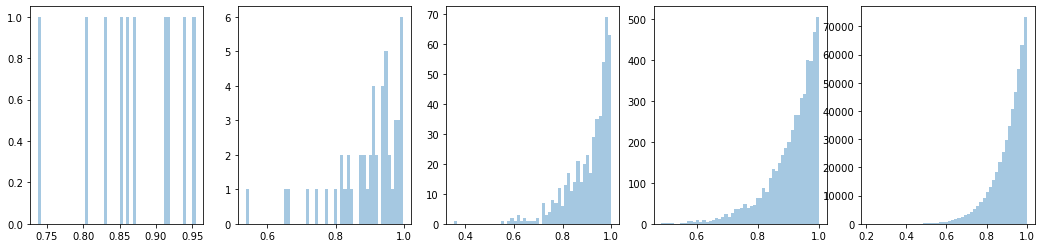

In [210]:
import seaborn as sns
fig, axes =  plt.subplots(1, 5, figsize=(18,4))

beta_distribution = beta(10, 1)

for i, each_sample in enumerate(sample_size):
    sns.distplot(beta_distribution.rvs(size=each_sample), kde=False, bins=50, ax=axes[i])

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

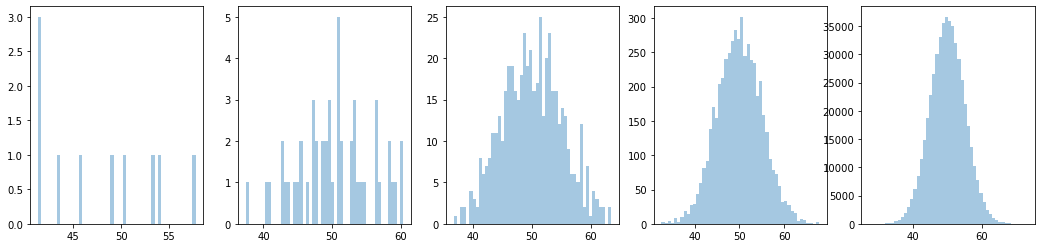

In [206]:
import seaborn as sns
fig, axes =  plt.subplots(1, 5, figsize=(18,4))

for i, each_sample in enumerate(sample_size):
    sns.distplot(normal_distribution.rvs(size=each_sample), kde=False, bins=50, ax=axes[i])

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [211]:
# your code here

from scipy.stats import binom

p = 0.15
n = 5

dist = binom(n, p)

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

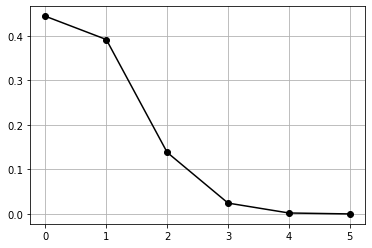

In [212]:
# run this code
x = range(n+1)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x), '-ko')
plt.grid()
plt.show()

#### Step 3: Explain what you observe from the plot above.

This shows the probability of my success to happen exactly N times. So, if 5 viewers enter my video on youtube, and their probability of clicking an advertise is 15%, then what is the probability of exactly N viewers clicking on it. For instance, the probability of exactly 1 click is ~40%.

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

<IPython.core.display.Javascript object>

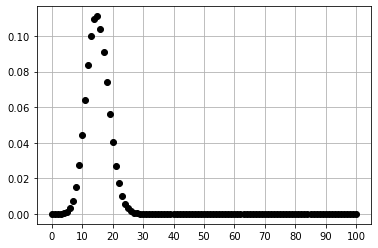

In [213]:
# your code here
n = 100

dist = binom(n, p)

# run this code
x = range(n+1)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x), 'ko')
plt.xticks(np.arange(0, n+1, n/10))
plt.grid()
plt.show()

In [214]:
dist.cdf(20) - dist.cdf(10)

0.8342328336830495

#### Step 5: What did you notice from the distribution plots? Comment your findings.

One thing to notice is that as you increase the number of users, the chance of knowing exactly how many users will click diminishes, so you probably need to work with ranges (what's the probability of ~20-30 users to click when 50 users enter the video)

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

The Poisson distribution explains the probability of an event to happen in a given fixed time frame. 
For example, if 5 buses passes on average in a range of 10 minutes, what would be the probability of passing - in the next 10 minutes - 2 buses 




#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [111]:
# your code here
from scipy.stats import poisson

mu = 300

dist = poisson(mu)
dist.pmf(320)

0.011612348610402475

#### Step 3: What is the probability of getting 60 visits?

In [112]:
# your code here
dist.pmf(60)

2.622743762294515e-64

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [113]:
# your code here

arr = dist.pmf(range(1001))

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

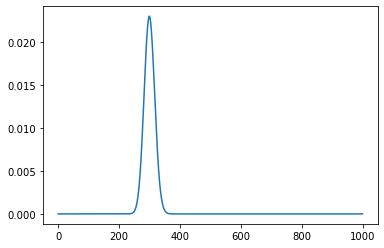

In [114]:
# run this code
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [216]:
# your code here

mu = 35
std = 8
n = 200
std_error = std/np.sqrt(n)


dist = norm(mu, std_error)
probabilidade_entre_30_35 = dist.cdf(35) - dist.cdf(30)
probabilidade_entre_30_35

<IPython.core.display.Javascript object>

0.5

#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [217]:
# your code here

minutes = 115 * 60 

tempo_medio_por_pacote = minutes / n

1 - dist.cdf(tempo_medio_por_pacote)

0.8116204410942089

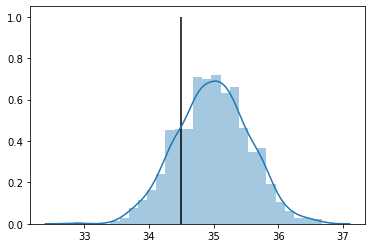

In [218]:
sns.distplot(dist.rvs(size=1000))
plt.vlines(34.5, 0, 1)

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [154]:
# your code here

dist = norm(200, 40)
1 - dist.cdf(300)

0.006209665325776159

#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [155]:
# your code here

dist.cdf(240) - dist.cdf(160)

0.6826894921370859

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [156]:
# your code here

dist.cdf(150)

0.10564977366685535

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [158]:
# your code here
1 - dist.cdf(3000)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [172]:
# your code here

dist = poisson(4)
dist.pmf(0)

0.01831563888873418

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [173]:
# your code here
1 - dist.cdf(1)

0.9084218055563291

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [174]:
# your code here
dist.cdf(6) - dist.cdf(2)

0.6512227160438819

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [219]:
# your code here

# via poisson hypothesis where the average should be proportional to the days, we have to create a new 
# poisson distribution that has average = 2 (because we had average = 4 for 30 days)

In [220]:
dist_half = poisson(2)
1 - dist_half.cdf(2)

0.3233235838169366

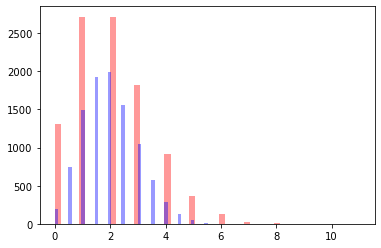

In [205]:
sns.distplot(dist_half.rvs(size=10000), kde=False, color='r')
sns.distplot(dist.rvs(size=10000)/2, kde=False, color='b')